<a href="https://colab.research.google.com/github/luizgontijo/notebooks_classes/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing in Python

This notebook presents some image processing techniques with python. The objective is to show some easy techniques to apply as pre-processing to use in images from datasets to train/test some Machine Learning models. 

The summary of the notebook:


1.   What is image processing;
2.   NumPy on image processing;
3.   Histogram with Matplotlib;
3.   Thresholding algorithms;
4.   Filters;
5.   Contrast enhancement;
6.   Transformation;
7.   Morphology operations;
9.   Noise e denoising;
10.  Segmentation;
11.  Finding contours;
12.  Finding edges;
13.  Corner detection;
14.  Face detection;
15.  Blurring faces for privacy protection.



## What is image processing?
Image processing is to apply of some operations to images, like enhance an image, extract useful information and analyze it and make decisions. 

We can list some applications for image processing: medical image analysis, artificial intelligence, image restoration and geospatial computing.

An image is made up of pixels. Each pixel has a position and a value that refers to its color. An image may be gray scale or colored. Gray scale images have just a channel with its pixels value ranging from 0 to 255. Colored images have three channels of color, one to red, oter to blue and other to green (the rgb set), with its pixels value ranging from 0 to 255 for each channel.

The skimage library has some good features we can use to manipulate images. The first we will see is to import some images.

But first, lets create a function to show images with better view.

In [1]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

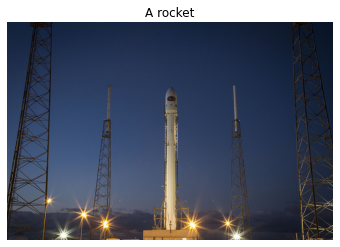

In [2]:
# show a image of a rocket
from skimage import data 
rocket_image = data.rocket()
show_image(rocket_image, 'A rocket')

From a colored image we can reach a gray scaled image using color function:

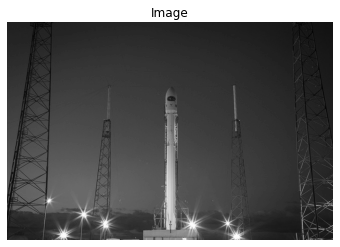

In [3]:
from skimage import color
rocket_image_gray = color.rgb2gray(rocket_image)
show_image(rocket_image_gray)

## NumPy on image processing

The NumPy library has some famous features. Some of those features are used in image processing too.

As a first demonstration, flip images:

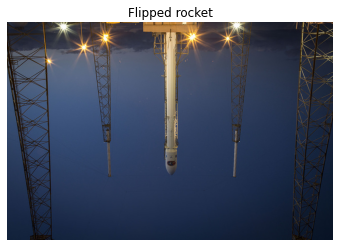

In [4]:
import numpy as np

flipped_rocket_image = np.flipud(rocket_image)
show_image(flipped_rocket_image, 'Flipped rocket')

NumPy also can be used to show the rgb channels of a image:

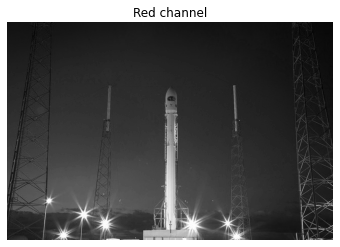

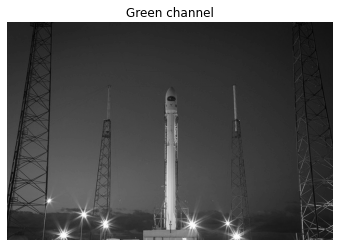

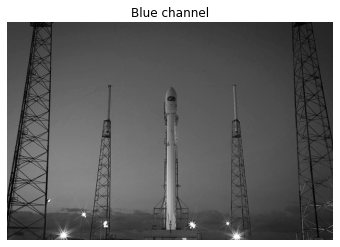

In [5]:
red = rocket_image[:,:,0]
green = rocket_image[:,:,1]
blue = rocket_image[:,:,2]

show_image(red, 'Red channel')
show_image(green, 'Green channel')
show_image(blue, 'Blue channel')

NumPy can also show the shape and size of images:

In [6]:
rocket_image.shape # the third argument in parenthesis indicates that there are three channels in that image

(427, 640, 3)

In [7]:
rocket_image.size # the size of a image is the total count of pixels: 427x640

819840

### Histogram with Matplotlib

MatplotLib is a famous library from python used to plot graphs and show images. I has used this library to create the function show_image().

But this library can also show the histogram of a image. Histograms show the count of each pixel value:

<function matplotlib.pyplot.show>

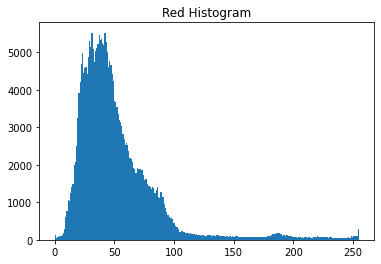

In [8]:
red = rocket_image[:, :, 0] # using the red channel of the rocket image.

plt.hist(red.ravel(), bins=256) # plot its histogram with 256 bins, the number of possible values of a pixel.
plt.title('Red Histogram')
plt.show

### Thresholding algorithms

Histograms are tipically used to to see the range of pixels values in a image. Using those pixel values, we can threshold then to a limit value:

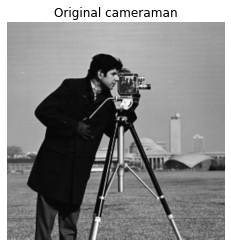

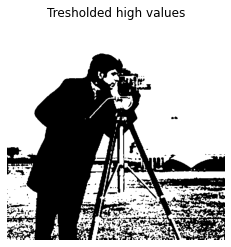

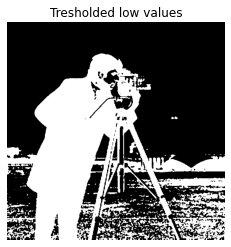

In [9]:
cameraman_image = data.camera()
show_image(cameraman_image, 'Original cameraman')

thresh = 120 # set a random thresh value

binary_high = cameraman_image > thresh
binary_low = cameraman_image <= thresh

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

To thresh a image is normally called "binarization" of the image. This technique is widely used to provide a better look in some images. As an axample take a look in the next image.

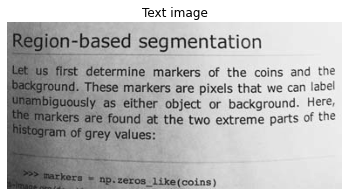

In [10]:
text_image = data.page()

show_image(text_image, 'Text image')

For the Text image, we can provide a better loking in its rigth conner. To do this the binarization is a good way. But, the value of thresh has to be defined. To do this, some algorithms are present in the skimage library. We can try all those algorithms using the function try_all_threshold() from skimage.filters library.

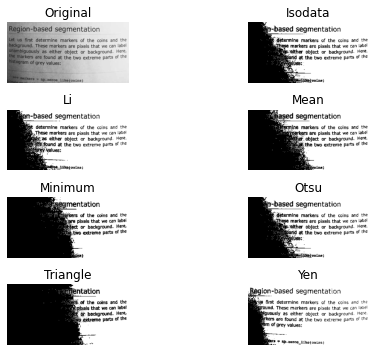

In [11]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(text_image, verbose=False)

To apply the optimal thresh we can use the Otsu algorithm:


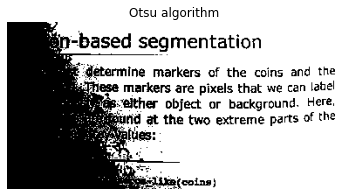

In [12]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(text_image)

text_binary_otsu = text_image > thresh

show_image(text_binary_otsu, 'Otsu algorithm')

As we can see by the use of those algorithms, the right corner don't show the words as we expected. To solve that problem, we have to apply the binariation to regions of the image. To do that we use the function threshold_local() from skimage.filters library.

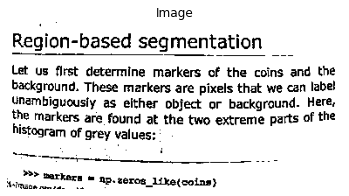

In [13]:
from skimage.filters import threshold_local

block_size = 35 # define the size of the region to apply the binarization

local_thresh = threshold_local(text_image, block_size, offset=10) # apply the function

binary_local = text_image > local_thresh

show_image(binary_local)

### Filters
A filter is a mathematical function applied to images. It can enhancing an image, emphasize or remove features, smooth an image or detect edges, for example. 

As an example, take a look in the Sobel Filter and its edge detection. To use that filter, we need the library skimage.filters ant its function called sobel().

But first, lets ma=ke a function to compare original images to processed images.


In [14]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

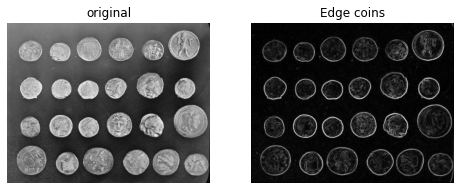

In [15]:
from skimage.filters import sobel

coins_image = data.coins() # use the coins image as an example

edge_coins_image = sobel(coins_image) # apply the filter

plot_comparison(coins_image, edge_coins_image, 'Edge coins')

We can use filters to smooth an image too. To see this feature, use the gaussian() filter function.

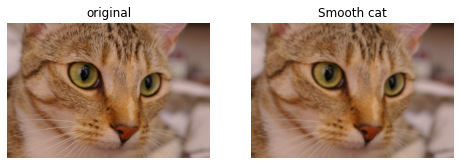

In [16]:
from skimage.filters import gaussian

cat_image = data.chelsea()

smmooth_cat_image = gaussian(cat_image, multichannel=True) # you have to specify the multichannel

plot_comparison(cat_image, smmooth_cat_image, 'Smooth cat')

### Contrast Enhancement

Enhance an image can show some features not present in the original data. We can enhace an image changing its contrast or doing whats is called histogram equalization.

The histogram equalization makes the histogram of the image flat. It changes the pixel values and makes some parts of the image more exposed compared to the original image. 

The histogram equalization is achieved using the equalize_hist() function from skmigage.exposure library.


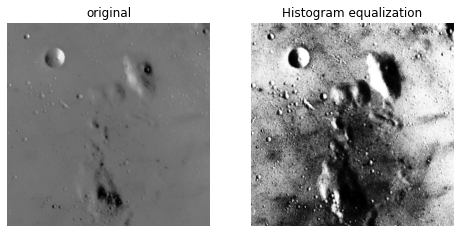

In [17]:
from skimage import exposure

moon_image = data.moon()

equalized_image_moon = exposure.equalize_hist(moon_image)

plot_comparison(moon_image, equalized_image_moon, 'Histogram equalization')

There ara some others algorithms to equalize the histogram, like adaptive histogram equalization:

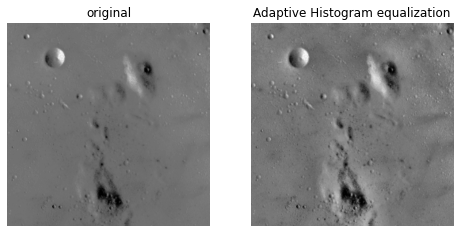

In [18]:
from skimage import exposure

adapthits_image_moon = exposure.equalize_adapthist(moon_image)

plot_comparison(moon_image, adapthits_image_moon, 'Adaptive Histogram equalization')

### Transformation

Transform a image can provide some pre-processing tools to better understand informations presents in the image. Some commun transformations of an image is to rotate, rescaling and resize. 

The library skimage.transform as some good functions to make transform images. 

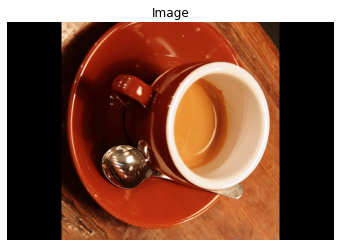

In [19]:
from skimage.transform import rotate

coffe_image = data.coffee()

rotate_coffe_image = rotate(coffe_image, -90) # rotate clockwise

show_image(rotate_coffe_image)

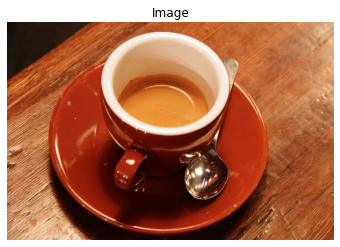

(400, 600, 3)


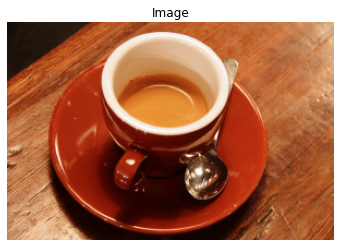

(200, 300, 3)


In [20]:
from skimage.transform import rescale

rescale_coffe_image = rescale(coffe_image, 1/2, anti_aliasing=True, multichannel=True) # rescaling by 1/2 of the original image

show_image(coffe_image)
print(coffe_image.shape)

show_image(rescale_coffe_image)
print(rescale_coffe_image.shape)



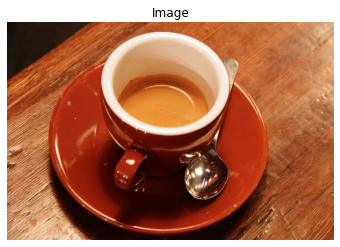

(400, 600, 3)


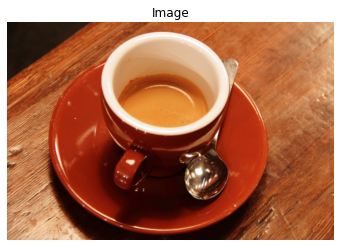

(2000, 3000, 3)


In [21]:
from skimage.transform import rescale

rescale_coffe_image = rescale(coffe_image, 5, anti_aliasing=True, multichannel=True) # rescaling by 1/2 of the original image

show_image(coffe_image)
print(coffe_image.shape) # the shape of the original image

show_image(rescale_coffe_image)
print(rescale_coffe_image.shape) # the shape of the rescaled image

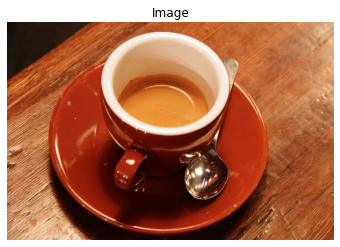

(400, 600, 3)


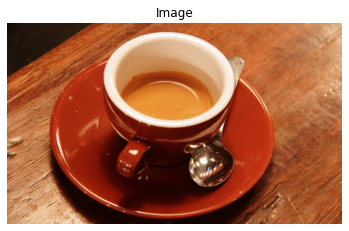

(600, 1000, 3)


In [22]:
from skimage.transform import resize

height = 600 
width = 1000

resized_coffe_image = resize(coffe_image, (height, width), anti_aliasing=True)

show_image(coffe_image)
print(coffe_image.shape) # the shape of the original image

show_image(resized_coffe_image)
print(resized_coffe_image.shape) # the shape of the resized image

### Morphological operations
Morphological operations provide some dilations and erosion on the images. 

Those operations can be done using the skimage.morphology library.

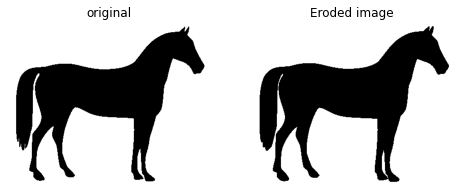

In [23]:
from skimage import morphology

horse_image = data.horse()

eroded_horse_image = morphology.binary_erosion(horse_image)

plot_comparison(horse_image, eroded_horse_image, 'Eroded image')

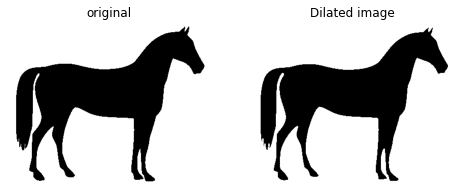

In [24]:
dilated_horse_image = morphology.binary_dilation(horse_image)

plot_comparison(horse_image, dilated_horse_image, 'Dilated image')

### Noise and Denoising
Noise are common distortions in images. A common noise we is te salt and pepper noise. We can simulate this noise by applying the random_noise function to the image.

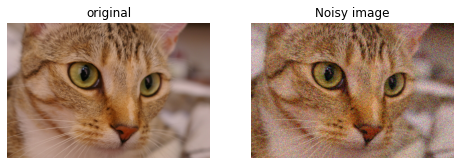

In [29]:
from skimage.util import random_noise

cat_image = data.chelsea()

noisy_cat_image = random_noise(cat_image)

plot_comparison(cat_image, noisy_cat_image, 'Noisy image')

To filter the noise out, we can use the denoise_tv_chambolle() function of the skimage.restoration library.

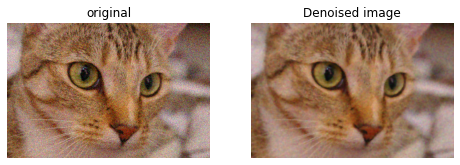

In [30]:
from skimage.restoration import denoise_tv_chambolle

denoised_cat_image = denoise_tv_chambolle(noisy_cat_image, weight=0.1,multichannel=True)

plot_comparison(noisy_cat_image, denoised_cat_image, 'Denoised image')

Other way to denoise an image is to apply the denoise_bilateral() function, also from skimage.restoration library.

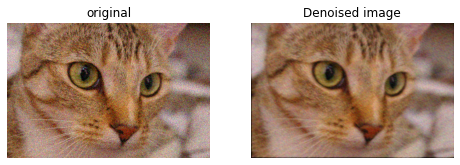

In [31]:
from skimage.restoration import denoise_bilateral

denoised_cat_image = denoise_bilateral(noisy_cat_image, multichannel=True)

plot_comparison(noisy_cat_image, denoised_cat_image, 'Denoised image')

### Segmentation

Image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

A simple thresholding of an image can provide an segmentation:

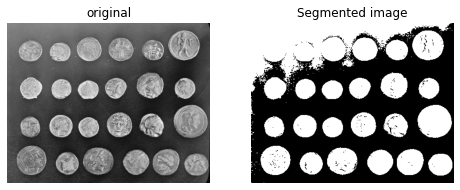

In [32]:
coins_image = data.coins()

thresh = 90 # set a random thresh value

segmented_coins_image = coins_image > thresh

plot_comparison(coins_image, segmented_coins_image, 'Segmented image')

But, we can segement an image by more meaningful regions. It can be done applying the superpixel segmentation. With this function, we can chose the number of regions to segment the image. This segmentations is done using unsupervised K-means algorithm.

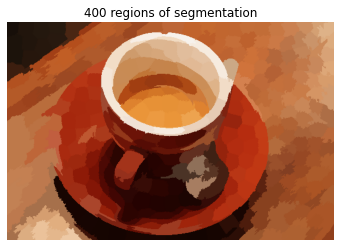

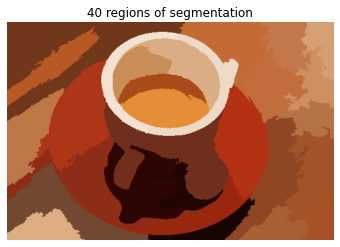

In [33]:
from skimage.segmentation import slic # import te slic function

from skimage.color import label2rgb # import te label2rgb function

segments_400 = slic(coffe_image, n_segments = 400) # segmentation with 400 regions

segmented_image_400 = label2rgb(segments_400, coffe_image, kind='avg')

segments_40 = slic(coffe_image, n_segments = 40) # segmentation with 400 regions

segmented_image_40 = label2rgb(segments_40, coffe_image, kind='avg')

show_image(segmented_image_400, '400 regions of segmentation')

show_image(segmented_image_40, '40 regions of segmentation')

### Finding contours
Finding contours of an image is a good way to explore its features. We can measure size, classify shapes ande also Determine the number of objects by just using the shape of the image. 

First lets find the contours of an image.

In [34]:
# A function to show the contour of the image 
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

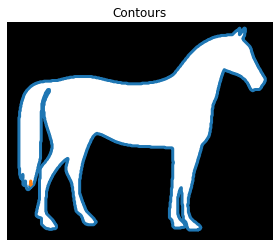

In [35]:
from skimage import measure

horse_image = data.horse()

contours_horse_image = measure.find_contours(horse_image, 0.8)

show_image_contour(horse_image, contours_horse_image)

We can now count the numbers showed in the dices. 

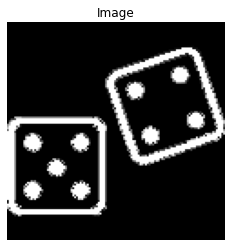

In [36]:
from PIL import Image
from numpy import asarray

dices_image = Image.open('/content/drive/My Drive/Notebooks/dices.png')

dices_image = asarray(dices_image)

show_image(dices_image)

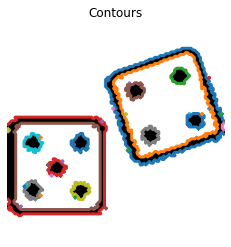

In [37]:
from skimage import filters

dices_image_gray = color.rgb2gray(dices_image)

thresh = filters.threshold_otsu(dices_image_gray)

binary_dices_image = dices_image_gray > thresh

contours = measure.find_contours(binary_dices_image, 0.8)

show_image_contour(binary_dices_image, contours)

### Finding Edges
Edge detection includes a variety of mathematical methods that aim at identifying points in a digital image at which the image brightness changes sharply or, more formally, has discontinuities.

A famous function to find edges is called canny. This functions is found in the skimage.feature library.


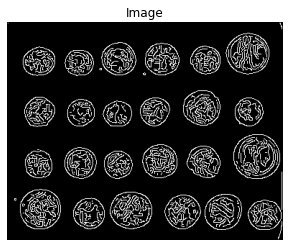

In [38]:
from skimage.feature import canny

coins_image = data.coins()

coins_image_gray = color.rgb2gray(coins_image)

canny_coins_image = canny(coins_image_gray)

show_image(canny_coins_image)

### Corner Detection
A corner can be defined as the intersection of two edges. A corner can also be defined as a point for which there are two dominant and different edge directions in a local neighbourhood of the point. An interest point is a point in an image which has a well-defined position and can be robustly detected

Corners can be found by using the function corner_harris() and corner_peaks() from skimage.feature library.



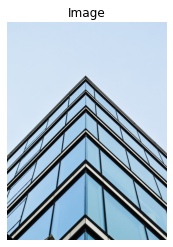

In [39]:
bulding_image = Image.open('/content/drive/My Drive/Notebooks/corners_building_top.jpg')

bulding_image = asarray(bulding_image)

show_image(bulding_image)

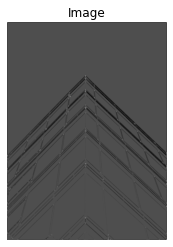

A total of 90 corners were detected.


In [40]:
from skimage.feature import corner_harris, corner_peaks

bulding_image_gray = color.rgb2gray(bulding_image)

corner_bulding_image_gray = corner_harris(bulding_image_gray) 

show_image(corner_bulding_image_gray) 

coords = corner_peaks(corner_bulding_image_gray, min_distance=5) # find de coordinates of the corners

print("A total of", len(coords), "corners were detected.")

The image above shows the corner as white points. But we can match those corners and show them.

But first we need do this.


In [41]:
def show_image_with_corners(image, coords, title="Corners detected"): 
  plt.imshow(image, interpolation='nearest', cmap='gray') 
  plt.title(title)
  plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15) 
  plt.axis('off')
  plt.show()

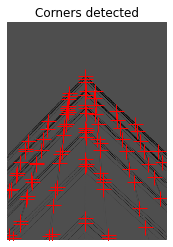

In [42]:
show_image_with_corners(corner_bulding_image_gray, coords)

### Face detection
Face detection is a computer technology being used in a variety of applications that identifies human faces in digital images. Face detection also refers to the psychological process by which humans locate and attend to faces in a visual scene.

The function we will use to face detection is named detect_multi_scale() from skimage.feature library. 

After a classifier is trained, it can be applied to a region of interest (of the same size as used during the training) in an input image. The classifier outputs a “1” if the region is likely to show the object (i.e., face/car), and “0” otherwise. To search for the object in the whole image one can move the search window across the image and check every location using the classifier. The classifier is designed so that it can be easily “resized” in order to be able to find the objects of interest at different sizes, which is more efficient than resizing the image itself. So, to find an object of an unknown size in the image the scan procedure should be done several times at different scales.

More informations about this algorithm can be found at this site [Haar Feature-based Cascade Classifier for Object Detection](https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html).


In [44]:
from skimage.feature import Cascade

trained_file = data.lbp_frontal_face_cascade_filename() # load the training file

detector = Cascade(trained_file) # initialize the detector cascade.

In [50]:
astronaut_image = data.astronaut()

# Apply detector on the image
detected = detector.detect_multi_scale(img=astrounaut_image, 
                                       scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(10, 10), max_size=(200, 200))

print(detected)

[{'r': 429, 'c': 413, 'width': 38, 'height': 38}, {'r': 71, 'c': 177, 'width': 85, 'height': 85}]


Create a function to show de detected face:

In [61]:
from matplotlib import patches

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()

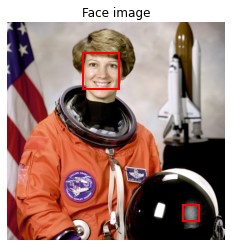

In [62]:
show_detected_face(astronaut_image, detected)

We can also detec more than one face:

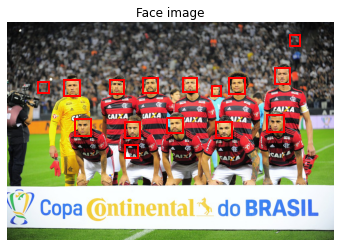

In [64]:
from PIL import Image
from numpy import asarray

flamengo_image = Image.open('/content/drive/My Drive/Notebooks/flamengo.jpg')

flamengo_image = asarray(flamengo_image)

detected = detector.detect_multi_scale(img=flamengo_image, 
                                       scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(10, 10), max_size=(200, 200))

show_detected_face(flamengo_image, detected)


### Blurring faces for privacy protection.

One application using some knowledge we that we obtained is to blur faces detected in ah image.

To do that we first get the faces presented in an image then apply a filter. The last step is to put back the faces in the original image. 

First extract the face rectangle from the image using the coordinates of the detected:


In [104]:
image = data.astronaut()

def getFaceRectangle(d):
    ''' Extracts the face from the image using the coordinates of the detected image '''
    # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
    
    # Extract the detected face
    face = image[ x:width, y:height]
    return face

Then detect the faces:

In [105]:
detected = detector.detect_multi_scale(img=image, 
                                       scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(10, 10), max_size=(200, 200))

Finally we apply the gaussian filter in each face:

In [106]:

def mergeBlurryFace(original, gaussian_image):
     # X and Y starting points of the face rectangle
    x, y  = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'],  d['c'] + d['height']
  
    original[x:width, y:height] =  gaussian_image
    return original


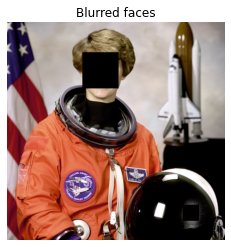

In [110]:
from skimage.filters import gaussian

#image.setflags(write=1)

for d in detected: 
  face = getFaceRectangle(d)
  
  gaussian_face = gaussian(face, multichannel=True, sigma = 1) # Apply gaussian filter to extracted face
  
  resulting_image = mergeBlurryFace(image, gaussian_face) # Merge this blurry face to our final image and show it

show_image(resulting_image, "Blurred faces")
 

## The End

Thank you so much for reading this notebook. I hope I helped you understand image processing.

Any problem, please, talk to me!

Bye!